# Download and examine raw data

To test our real-time filtering prototypes, we used publicly available electrophysiological data from [Steinmetz et al., 2019](https://www.nature.com/articles/s41586-019-1787-x). This dataset was recorded using Neuropixel probes, the type of probe we ultimately want to use with the real-time filtering system. 

## Imports

In [1]:
import os
import requests

import numpy as np
import h5py
from matplotlib import pyplot as plt

## Download data

To use the data from Steinmetz et al., we first need to download the files from the public server they're hosted on and store them locally. The raw dataset consists of three `.npz` files. We will store these files in `<project root>/data/raw`. If they already exist, the script avoids re-downloading them.

In [2]:
# Relative path to directory where files are stored
RAW_DATA_DIR = '../data/raw'

# Filenames and URLs to download files from
FILE_URLS = [
    ('steinmetz_part0.npz', 'https://osf.io/agvxh/download'), 
    ('steinmetz_part1.npz', 'https://osf.io/uv3mw/download'), 
    ('steinmetz_part2.npz', 'https://osf.io/ehmw2/download'),
]

def fetch(url, fpath):
    """Download file from URL to specified path."""
    
    try:
        r = requests.get(url)
    except requests.ConnectionError:
        print('Failed to download data!')
    else:
        if r.status_code != requests.codes.ok:
            print('Failed to download data!')
        else:
            with open(fpath, 'wb') as f:
                f.write(r.content)

# Download all files from respective URLs
for fname, url in FILE_URLS:
    
    fpath = os.path.join(RAW_DATA_DIR, fname)
    
    if os.path.isfile(fpath):
        print(f"File '{fname}' already exists")
    else:
        print(f"File '{fname}' not found. Downloading from {url}...")
        fetch(url, fpath)
        print('Done.')

File 'steinmetz_part0.npz' already exists
File 'steinmetz_part1.npz' already exists
File 'steinmetz_part2.npz' already exists


## Load raw data from files

In [3]:
# Load raw Steinmetz data from files
print(f"Loading Steinmetz data from '{RAW_DATA_DIR}'...")
raw_data_fnames = [x[0] for x in FILE_URLS]
input_fpaths = [os.path.join(RAW_DATA_DIR, f) for f in raw_data_fnames]
all_sessions = np.array([])
for f in input_fpaths:
    all_sessions = np.hstack((all_sessions, np.load(f, allow_pickle=True)['dat']))
print('Done.')

# Get number of sessions
n_sessions = all_sessions.shape[0]
print(f'Num. sessions: {n_sessions}')

Loading Steinmetz data from '../data/raw'...
Done.
Num. sessions: 39


## Select session

In [4]:
# Session to inspect
SESSION_NUM = 11

# Unpack session data
data = all_sessions[SESSION_NUM]
bin_size = data['bin_size']
spks = data['spks']
n_neurons = spks.shape[0]
n_trials = spks.shape[1]
n_smps_trial = spks.shape[2]
n_smps_total = n_trials * n_smps_trial

print(f'Session: {SESSION_NUM}')
print(f'Bin size: {bin_size} sec')
print(f'Num. neurons: {n_neurons}')
print(f'Num. trials: {n_trials}')
print(f'Num. samples/trial: {n_smps_trial}')
print(f'Num. samples total: {n_smps_total}')

Session: 11
Bin size: 0.01 sec
Num. neurons: 698
Num. trials: 340
Num. samples/trial: 250
Num. samples total: 85000


## Plot spike counts for trial

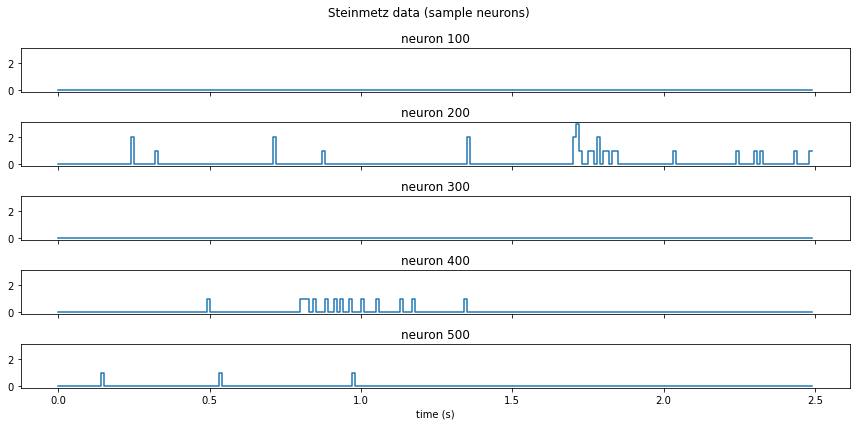

In [11]:
# Trial to plot
TRIAL_NUM = 1

# Neurons to plot
NEURONS_PLT = [100, 200, 300, 400, 500]

t_vals = bin_size * np.arange(n_smps_trial)

fig, ax = plt.subplots(len(NEURONS_PLT), 1, figsize=(12, 6), sharex=True, sharey=True)

for i, n in enumerate(NEURONS_PLT):
    ax[i].set_title(f'neuron {n}')
    ax[i].plot(t_vals, spks[n, TRIAL_NUM, :], drawstyle='steps-pre')

ax[-1].set(xlabel='time (s)')

fig.suptitle('Steinmetz data (sample neurons)')
    
plt.tight_layout()